# 1. Importing Library

In [291]:
!pip install ta

In [292]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import ta
import warnings
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [293]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset/BTC-USD.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [294]:
df['Daily_change'] = df['Adj Close'].diff()
daily_change= df[['Date','Daily_change']]

In [295]:
daily_change.fillna(0,inplace=True)

In [296]:
daily_change['Date'] = pd.to_datetime(daily_change['Date'])

In [297]:
daily_change['Date'].dt.strftime('%Y-%m')
px.line(data_frame=daily_change,x=daily_change['Date'],y='Daily_change')

In [298]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# **Analyisis of 2015**

In [299]:
y_2015 = df.loc[(df['Date'] >= '2015-01-01')
                     & (df['Date'] < '2016-01-01')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Daily_change
106,2015-01-01,320.434998,320.434998,314.002991,314.248993,-5.944000
107,2015-01-02,314.079010,315.838989,313.565002,315.032013,0.783020
108,2015-01-03,314.846008,315.149994,281.082001,281.082001,-33.950012
109,2015-01-04,281.145996,287.230011,257.612000,264.195007,-16.886994
110,2015-01-05,265.084015,278.341003,265.084015,274.473999,10.278992
...,...,...,...,...,...,...
466,2015-12-27,416.514008,424.006989,408.882996,422.822998,5.549011
467,2015-12-28,423.342987,429.769012,418.480988,422.278992,-0.544006
468,2015-12-29,422.097992,432.983002,420.627014,432.983002,10.704010
469,2015-12-30,433.299988,434.386993,422.084015,426.619995,-6.363007


In [300]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))

<Axes: xlabel='Date'>

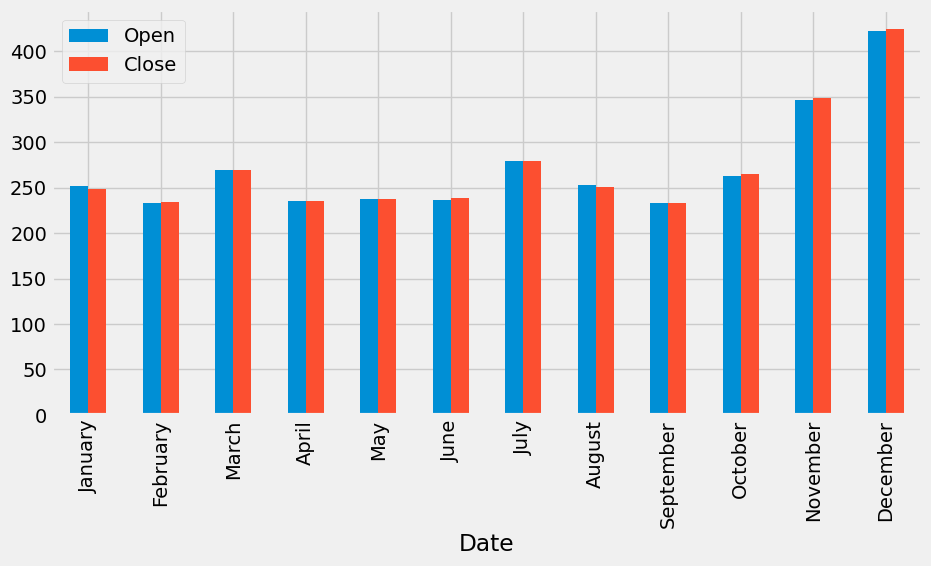

In [301]:
monthwise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise.plot(kind='bar', figsize=(10, 5),)

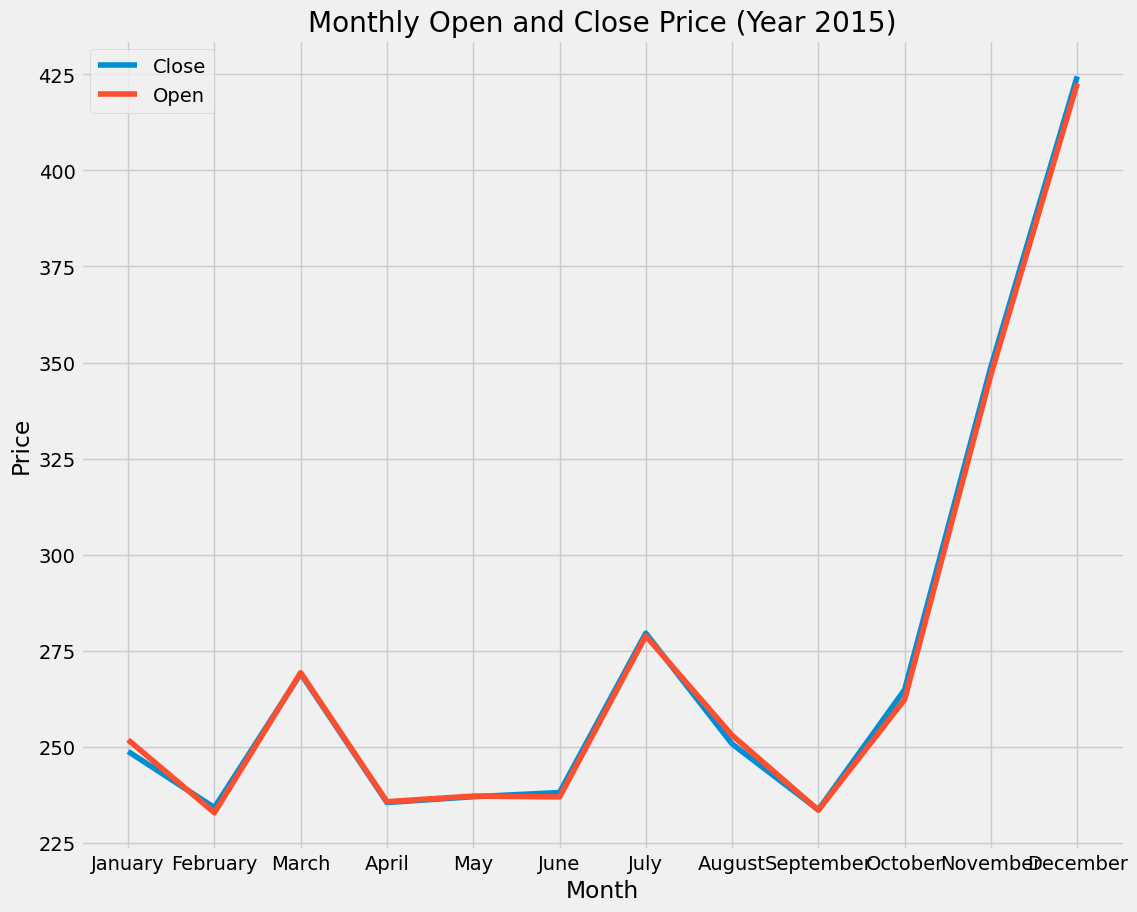

In [302]:
plt.figure(figsize=(12,10))
sns.lineplot(data=monthwise,x=monthwise.index,y='Close',label='Close')
sns.lineplot(data=monthwise,x=monthwise.index,y='Open',label='Open')
plt.title('Monthly Open and Close Price (Year 2015)')
plt.ylabel('Price')
plt.xlabel('Month')
plt.legend()
plt.show()

# Analysis of Year 2016

In [303]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2016 = df.loc[(df['Date'] >= '2016-01-01')
                     & (df['Date'] < '2017-01-01')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Daily_change
471,2016-01-01,430.721008,436.246002,427.515015,434.334015,3.767029
472,2016-01-02,434.622009,436.062012,431.869995,433.437988,-0.896027
473,2016-01-03,433.578003,433.743011,424.705994,430.010986,-3.427002
474,2016-01-04,430.061005,434.516998,429.084015,433.091003,3.080017
475,2016-01-05,433.069000,434.182007,429.675995,431.959991,-1.131012
...,...,...,...,...,...,...
832,2016-12-27,908.354004,940.047974,904.255005,933.197998,25.588013
833,2016-12-28,934.830994,975.921021,934.830994,975.921021,42.723023
834,2016-12-29,975.125000,979.396973,954.502991,973.497009,-2.424012
835,2016-12-30,972.534973,972.534973,934.833008,961.237976,-12.259033


<Axes: xlabel='Date'>

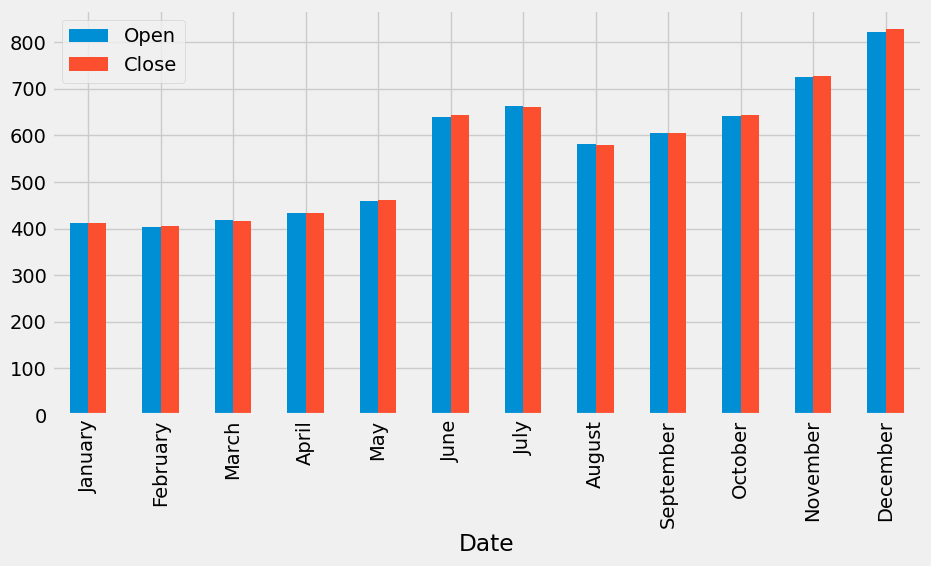

In [304]:
monthwise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise.plot(kind='bar', figsize=(10, 5))

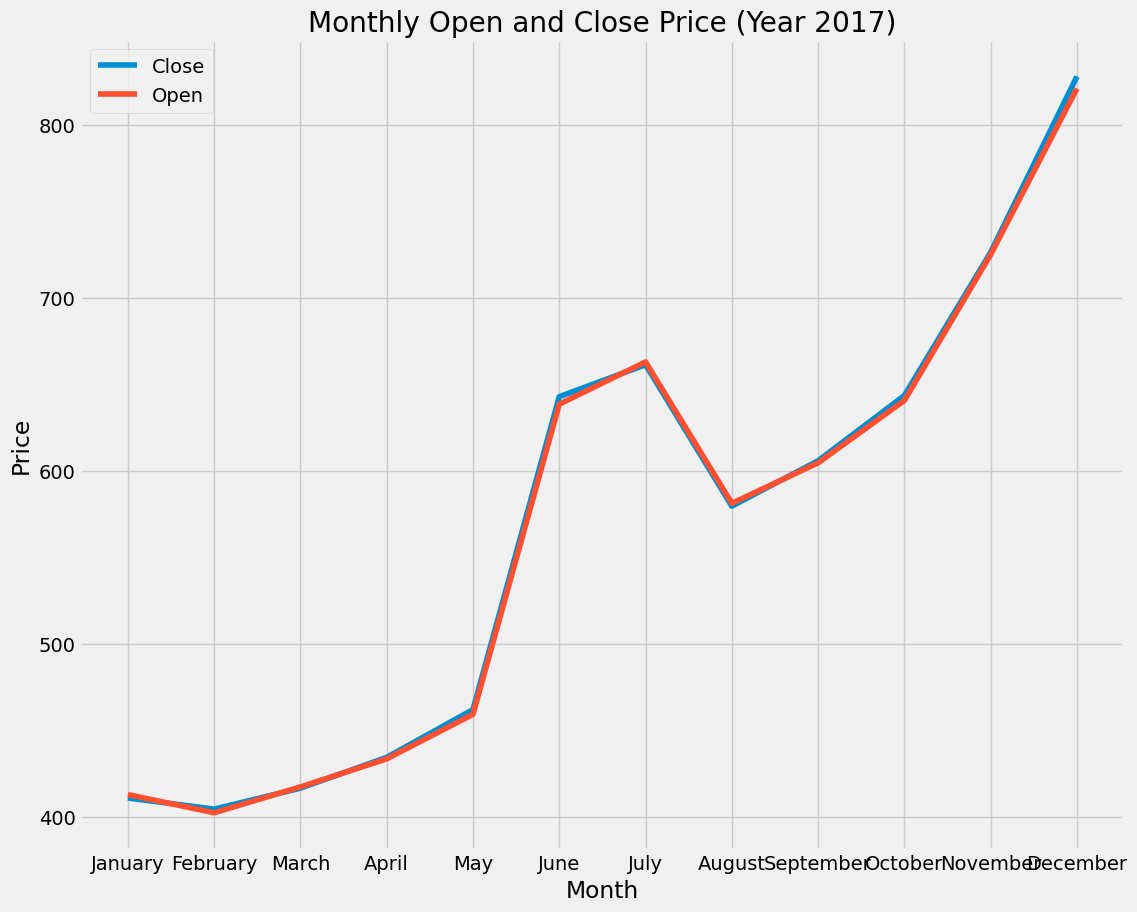

In [305]:
plt.figure(figsize=(12,10))
sns.lineplot(data=monthwise,x=monthwise.index,y='Close',label='Close')
sns.lineplot(data=monthwise,x=monthwise.index,y='Open',label='Open')
plt.title('Monthly Open and Close Price (Year 2017)')
plt.ylabel('Price')
plt.xlabel('Month')
plt.legend()
plt.show()

# Analysis of Year 2017

In [306]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2017 = df.loc[(df['Date'] >= '2017-01-01')
                     & (df['Date'] < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Daily_change
837,2017-01-01,963.658020,1003.080017,958.698975,998.325012,34.582031
838,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,23.424988
839,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,22.089966
840,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,110.890014
841,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,-141.349975
...,...,...,...,...,...,...
1197,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,-261.299805
1198,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000,-1232.000000
1199,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195,49.700195
1200,2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195,-1704.000000


<Axes: xlabel='Date'>

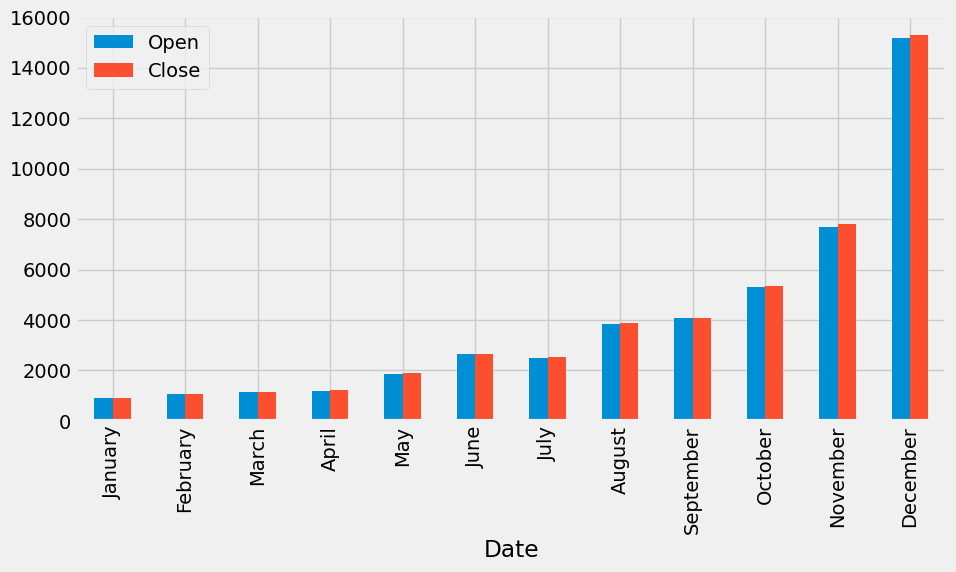

In [307]:
monthwise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise.plot(kind='bar', figsize=(10, 5))

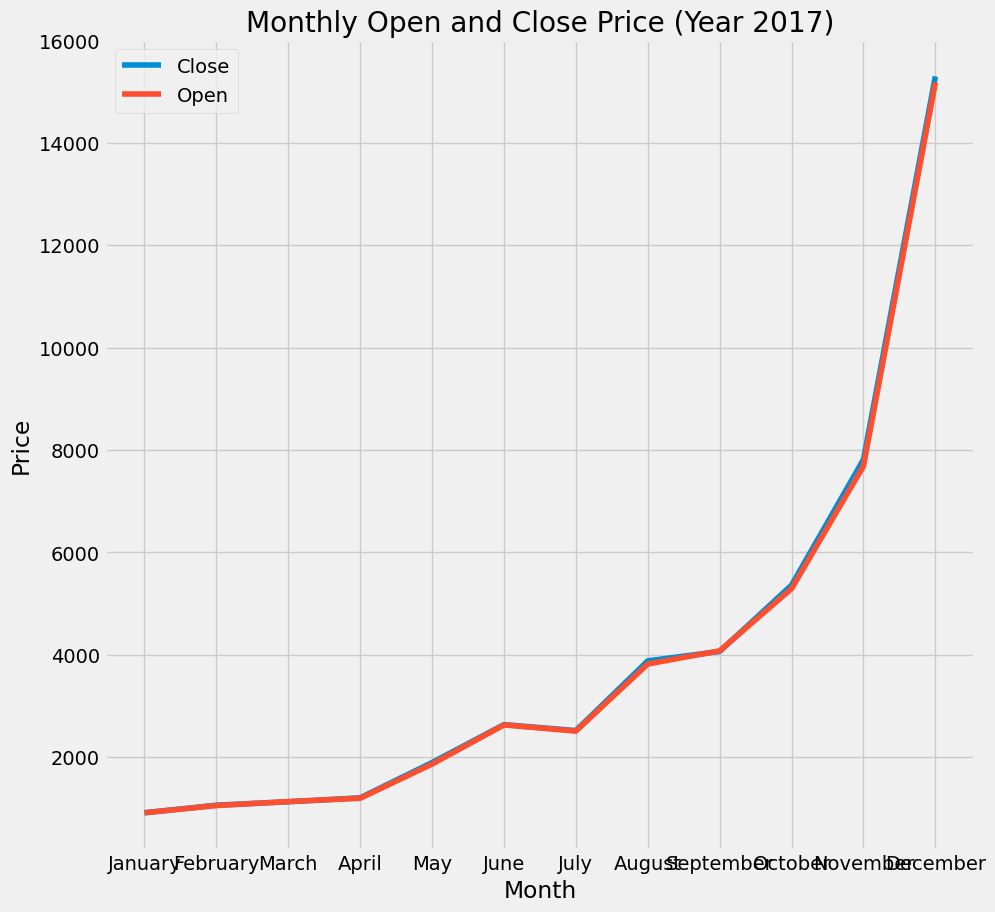

In [308]:
plt.figure(figsize=(10,10))
sns.lineplot(data=monthwise,x=monthwise.index,y='Close',label='Close')
sns.lineplot(data=monthwise,x=monthwise.index,y='Open',label='Open')
plt.title('Monthly Open and Close Price (Year 2017)')
plt.ylabel('Price')
plt.xlabel('Month')
plt.legend()
plt.show()

# Analysis of Year 2018

In [309]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2018 = df.loc[(df['Date'] >= '2018-01-01')
                     & (df['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Daily_change
1202,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,-499.200196
1203,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,1324.899414
1204,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,218.900391
1205,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,398.200195
1206,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,1830.299805
...,...,...,...,...,...,...
1562,2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496,-202.464111
1563,2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701,269.085205
1564,2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691,-103.510010
1565,2018-12-30,3822.384766,3901.908936,3797.219238,3865.952637,45.543946


<Axes: xlabel='Date'>

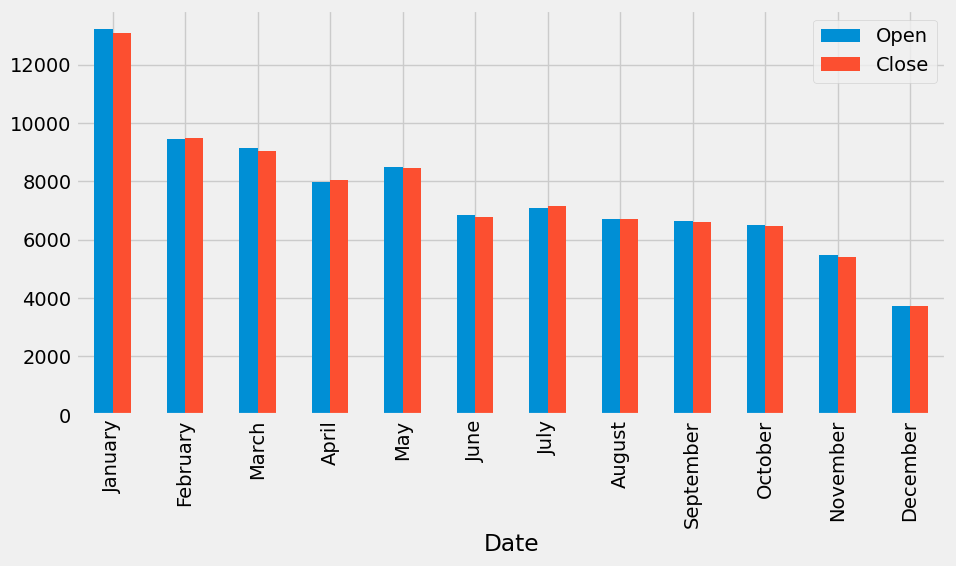

In [310]:
monthwise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise.plot(kind='bar', figsize=(10, 5))

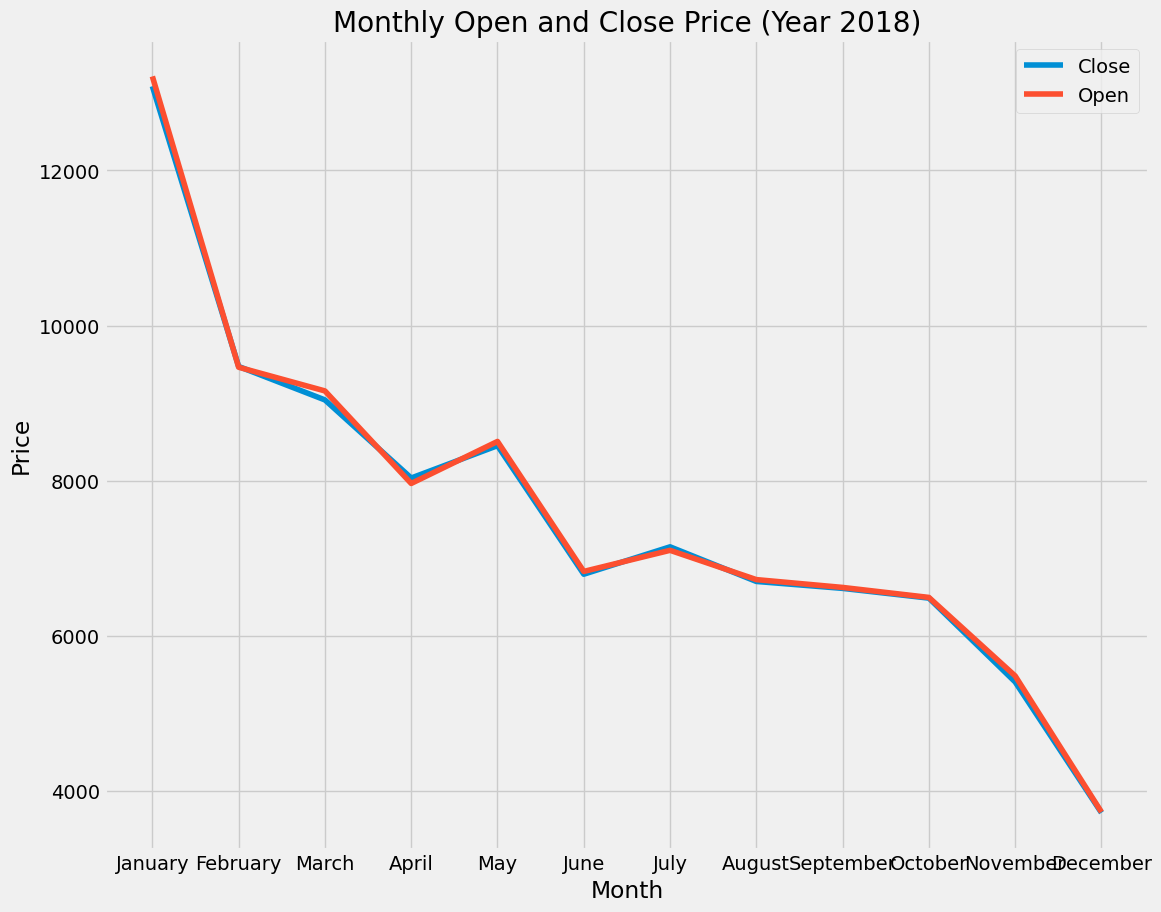

In [311]:
plt.figure(figsize=(12,10))
sns.lineplot(data=monthwise,x=monthwise.index,y='Close',label='Close')
sns.lineplot(data=monthwise,x=monthwise.index,y='Open',label='Open')
plt.title('Monthly Open and Close Price (Year 2018)')
plt.ylabel('Price')
plt.xlabel('Month')
plt.legend()
plt.show()

# Analysis of Year 2019

In [312]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2019 = df.loc[(df['Date'] >= '2019-01-01')
                     & (df['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Daily_change
1567,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,100.819581
1568,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,99.889404
1569,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,-106.668213
1570,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,20.976318
1571,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,-12.522949
...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,51.121582
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,27.901855
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,104.662598
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,-129.657715


<Axes: xlabel='Date'>

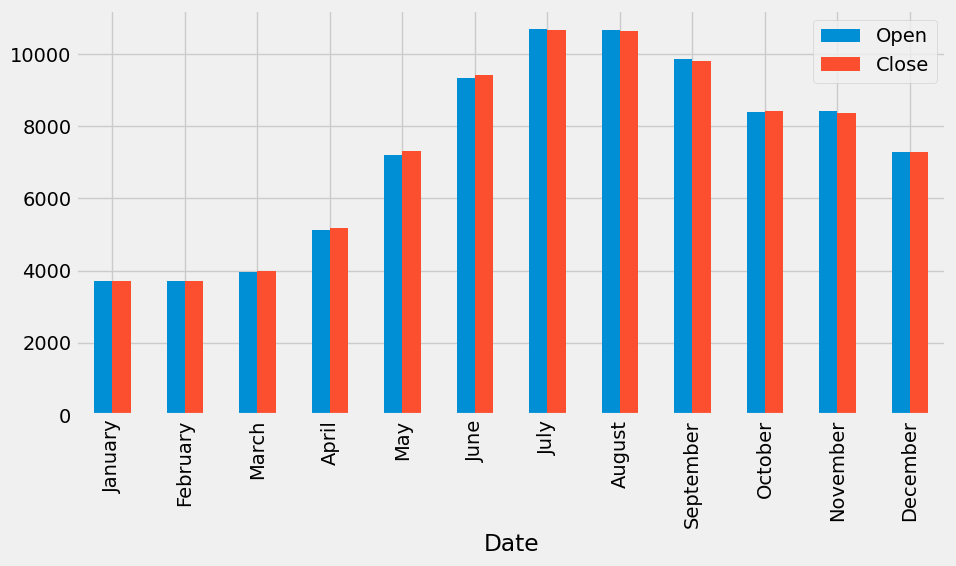

In [313]:
monthwise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise.plot(kind='bar', figsize=(10, 5))

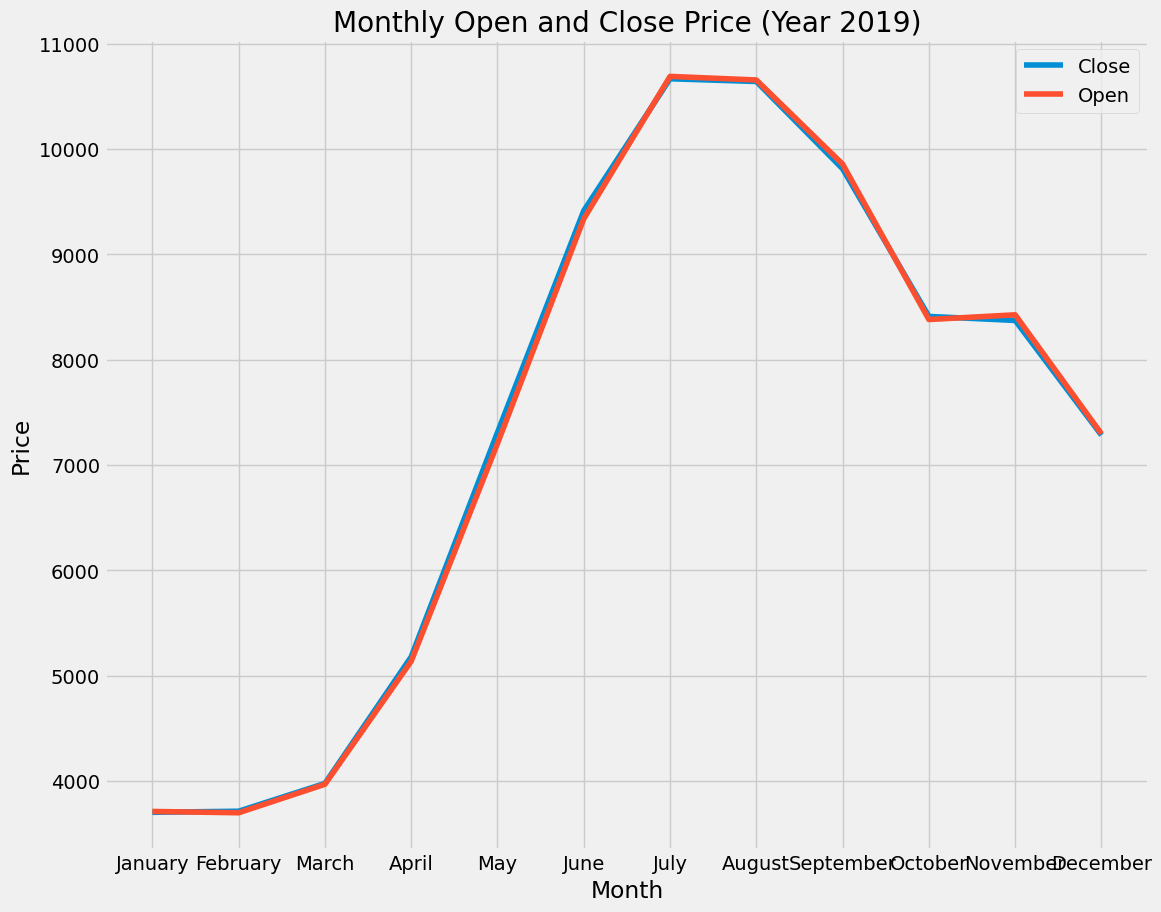

In [314]:
plt.figure(figsize=(12,10))
sns.lineplot(data=monthwise,x=monthwise.index,y='Close',label='Close')
sns.lineplot(data=monthwise,x=monthwise.index,y='Open',label='Open')
plt.title('Monthly Open and Close Price (Year 2019)')
plt.ylabel('Price')
plt.xlabel('Month')
plt.legend()
plt.show()

# Analysis of Year 2020

In [315]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2020 = df.loc[(df['Date'] >= '2020-01-01')
                     & (df['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Daily_change
1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,6.575195
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,-214.704101
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,359.414062
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,65.772461
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,0.660645
...,...,...,...,...,...,...
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,-164.742187
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,812.513672
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,277.628906
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,1478.515625


<Axes: xlabel='Date'>

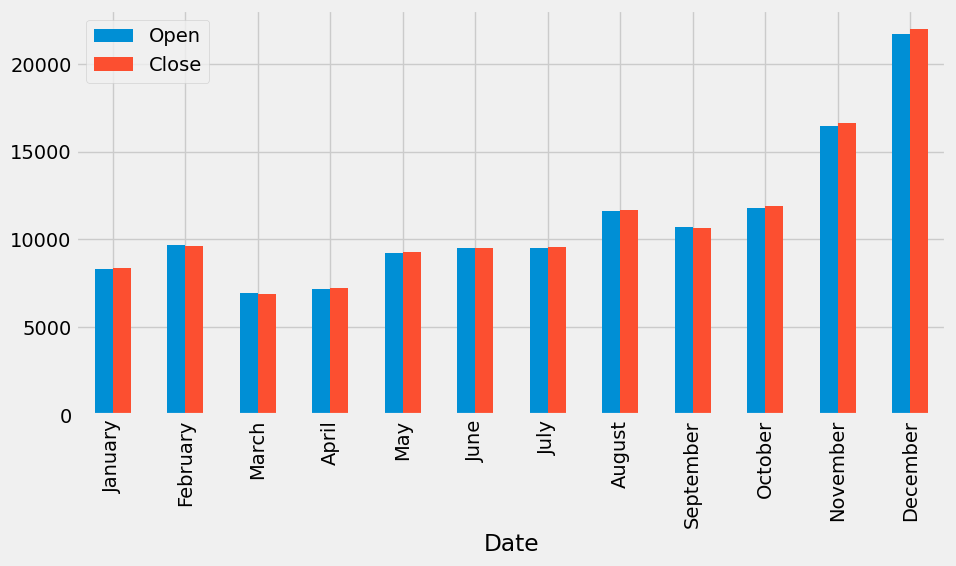

In [316]:
monthwise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise.plot(kind='bar', figsize=(10, 5))

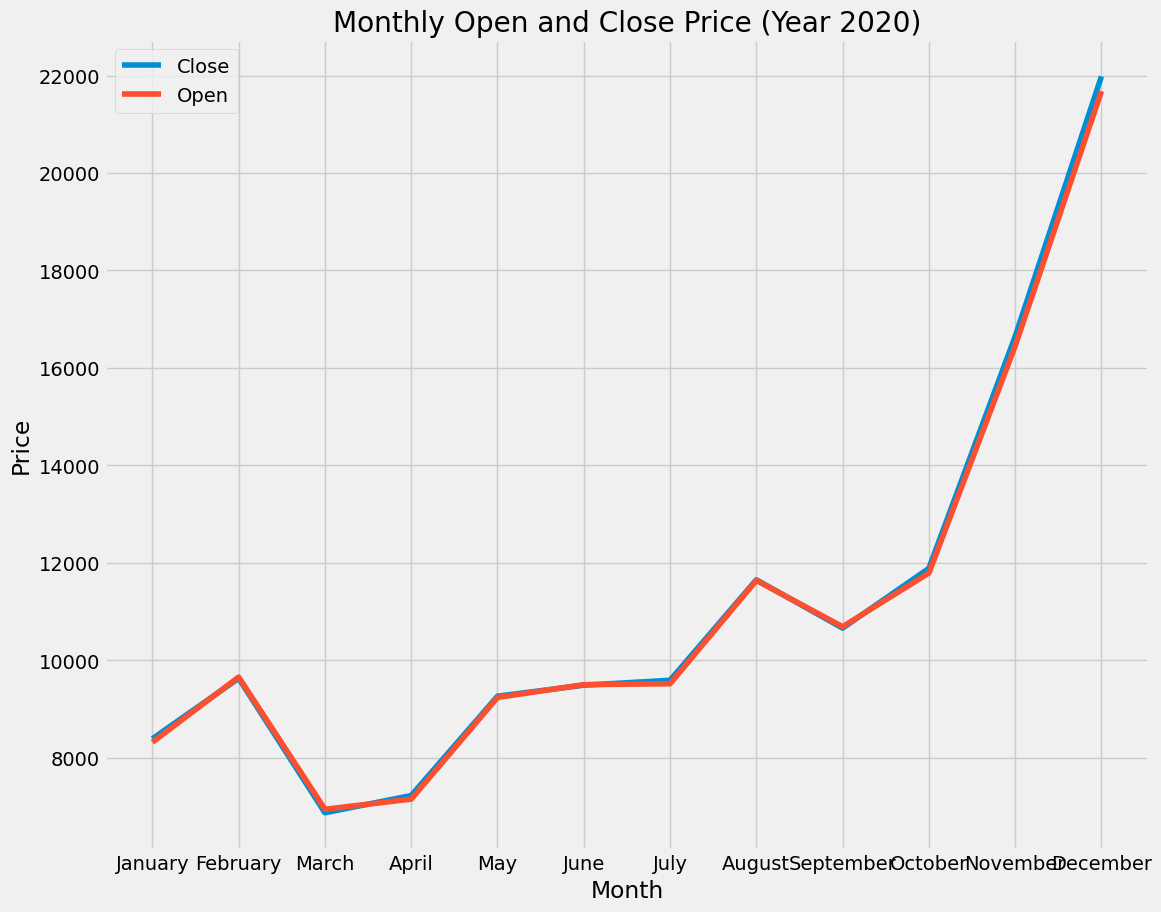

In [317]:
plt.figure(figsize=(12,10))
sns.lineplot(data=monthwise,x=monthwise.index,y='Close',label='Close')
sns.lineplot(data=monthwise,x=monthwise.index,y='Open',label='Open')
plt.title('Monthly Open and Close Price (Year 2020)')
plt.ylabel('Price')
plt.xlabel('Month')
plt.legend()
plt.show()

# Analysis of Year 2021

In [318]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2021 = df.loc[(df['Date'] >= '2021-01-01')
                     & (df['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Daily_change
2298,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,372.431641
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,2753.115234
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,654.755860
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,-810.109375
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,2020.515625
...,...,...,...,...,...,...
2657,2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,379.656250
2658,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,-169.097656
2659,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,-3051.562500
2660,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,-1144.144531


<Axes: xlabel='Date'>

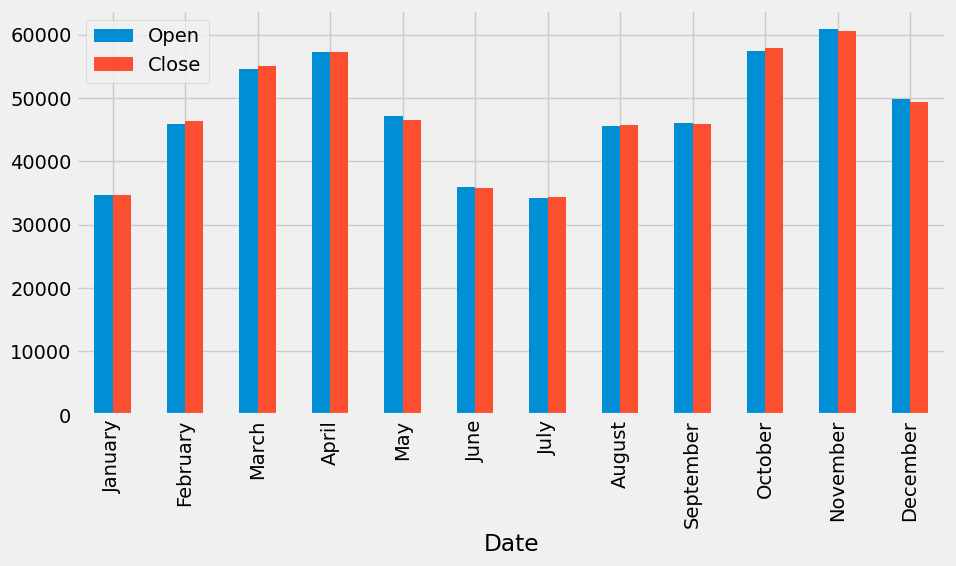

In [319]:
monthwise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise.plot(kind='bar', figsize=(10, 5))

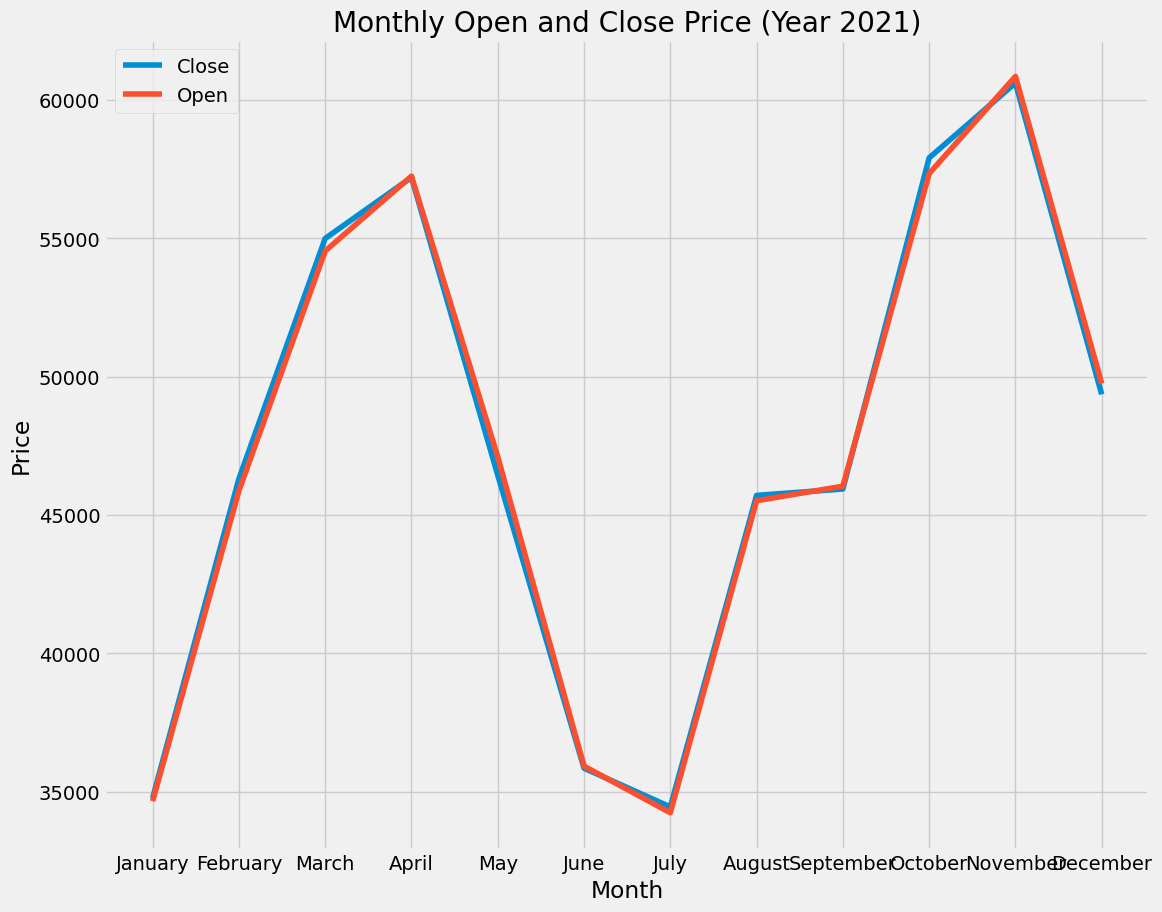

In [320]:
plt.figure(figsize=(12,10))
sns.lineplot(data=monthwise,x=monthwise.index,y='Close',label='Close')
sns.lineplot(data=monthwise,x=monthwise.index,y='Open',label='Open')
plt.title('Monthly Open and Close Price (Year 2021)')
plt.ylabel('Price')
plt.xlabel('Month')
plt.legend()
plt.show()

In [321]:
dataset_lstm = df[['Date','Close']]
print("Shape of close dataframe:", dataset_lstm.shape)

Shape of close dataframe: (2713, 2)


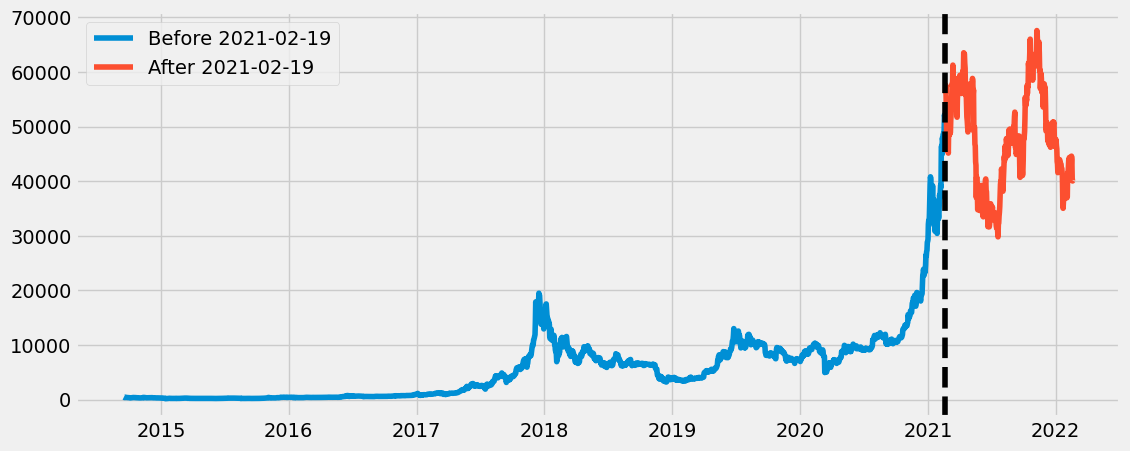

In [322]:
import matplotlib.dates as mdates
before=  dataset_lstm.loc[dataset_lstm['Date'] < '2021-02-19'].index
before
after = dataset_lstm.loc[dataset_lstm['Date']>'2021-02-19'].index
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot('Date', 'Close', data=dataset_lstm.iloc[before], label='Before 2021-02-19')
ax.plot('Date', 'Close', data=dataset_lstm.iloc[after], label='After 2021-02-19')
date_num = mdates.date2num(pd.to_datetime('2021-02-19'))
ax.axvline(x=date_num, color='black', linestyle='--')
ax.legend()
plt.show()

In [323]:
datset_lstm = df[df['Date'] > '2021-02-19']
close_stock = dataset_lstm.copy()
print("Total data for prediction: ",df.shape[0])

Total data for prediction:  2713


In [324]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_change
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-32.894013
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-29.644012
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,14.108002
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-10.082978
...,...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813,-3423.847656
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,-507.035156


In [325]:
del dataset_lstm['Date']
scaler=MinMaxScaler(feature_range=(0,1))
dataset_lstm=scaler.fit_transform(np.array(dataset_lstm).reshape(-1,1))
print(df.shape)

(2713, 8)


* ### Splitting data into Training set and Testing set

In [326]:
training_size=int(len(dataset_lstm)*0.60)
test_size=len(dataset_lstm)-training_size
train_data,test_data=dataset_lstm[0:training_size,:],dataset_lstm[training_size:len(dataset_lstm),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1627, 1)
test_data:  (1086, 1)


In [327]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [328]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1611, 15)
y_train:  (1611,)
X_test:  (1070, 15)
y_test (1070,)


In [329]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1611, 15, 1)
X_test:  (1070, 15, 1)


In [330]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [331]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0021 - val_loss: 0.0678
Epoch 2/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.0888e-04 - val_loss: 0.0037
Epoch 3/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7397e-04 - val_loss: 0.1629
Epoch 4/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5672e-05 - val_loss: 0.1011
Epoch 5/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.0555e-05 - val_loss: 0.0741
Epoch 6/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.6768e-05 - val_loss: 0.0539
Epoch 7/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.3596e-05 - val_loss: 0.0389
Epoch 8/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.1030e-05 - val_loss: 0.0278
Epoch 9/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.8734e-05 - val_loss: 0.0195
Epoch 10/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.6649e-05 - val_loss: 0.0134
Epoch 11/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.4764e-05 - val_loss: 0.0092
Epoch 12/200

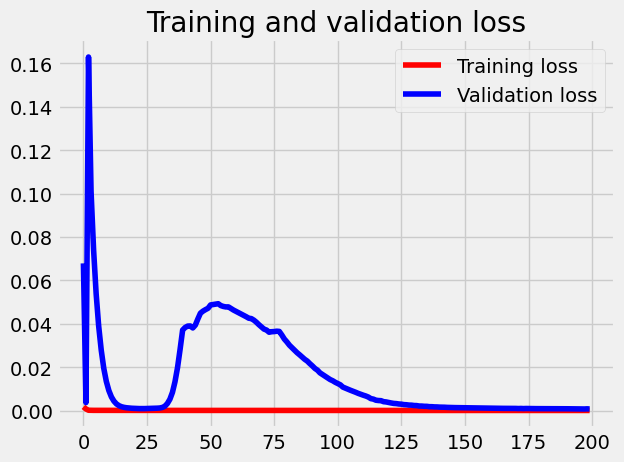

<Figure size 640x480 with 0 Axes>

In [332]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [333]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


((1611, 1), (1070, 1))

- # Model Evaluation

In [334]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

- ## Evaluation metrices RMSE, MSE and MAE

In [335]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  293.9542970365911
Train data MSE:  86409.12874627643
Train data MAE:  127.16391189718269
-------------------------------------------------------------------------------------
Test data RMSE:  1782.782627835142
Test data MSE:  3178313.8981107743
Test data MAE:  1077.8230834003941


- ## R square score for regression

In [336]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9935933511290092
Test data R2 score: 0.991291592536522


- # Comparision of original stock close price and predicted close price

In [337]:

look_back=time_step
trainPredictPlot = np.empty_like(dataset_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)
testPredictPlot = np.empty_like(dataset_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataset_lstm)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2713, 1)
Test predicted data:  (2713, 1)


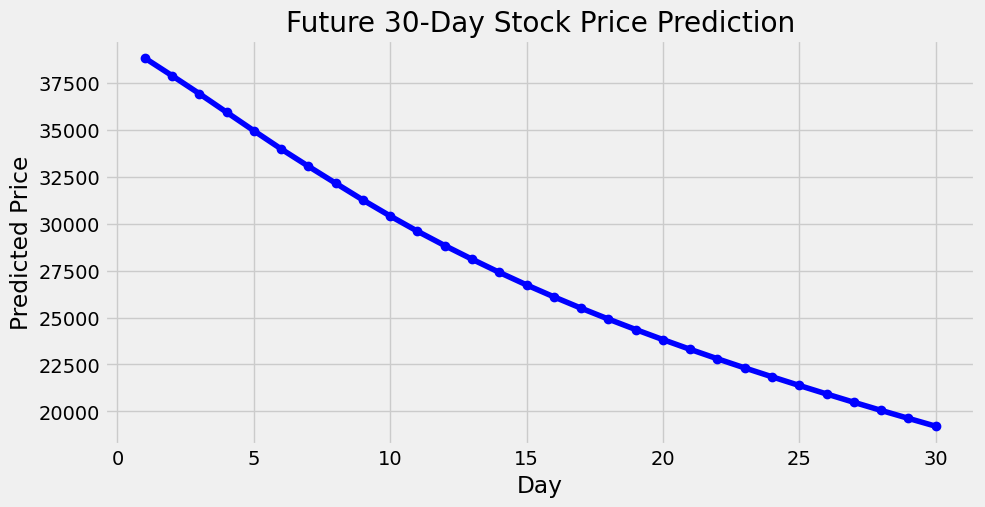

In [338]:
def predict_future_lstm(model, last_data, n_days, scaler, time_step=15):
    future_input = last_data[-time_step:].reshape(1, time_step, 1)
    future_predictions_scaled = []

    for _ in range(n_days):
        next_scaled = model.predict(future_input, verbose=0)[0][0]
        future_predictions_scaled.append(next_scaled)
        future_input = np.append(future_input[:, 1:, :], [[[next_scaled]]], axis=1)
    scaled_min = 0.0
    scaled_max = 1.0
    clipped_scaled = np.clip(future_predictions_scaled, scaled_min, scaled_max)


    future_prices = scaler.inverse_transform(np.array(clipped_scaled).reshape(-1, 1))
    return future_prices

future_days = 30
future_prices = predict_future_lstm(model, dataset_lstm, future_days, scaler)
plt.figure(figsize=(10, 5))
plt.plot(range(1, future_days + 1), future_prices, marker='o', color='blue')
plt.title("Future 30-Day Stock Price Prediction")
plt.xlabel("Day")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()


In [339]:
def dataset_lr(df):
  df = df.copy()
  df['Close_Lag1'] = df['Close'].shift(1)
  df['High_Low_Spread'] = df['High'] - df['Low']
  df['Volatility'] = df['High_Low_Spread'] / df['Open']
  df.dropna(inplace=True)
  return df
dataset = dataset_lr(pd.read_csv('/content/drive/MyDrive/Dataset/BTC-USD.csv'))
features = ['Close_Lag1', 'High', 'Low', 'Open', 'Volume', 'High_Low_Spread', 'Volatility']
X = dataset[features]
y = dataset['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [340]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['Close_Lag1', 'High', 'Low', 'Open', 'Volume', 'High_Low_Spread', 'Volatility'])
    ], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
lr_preds = pipeline.predict(X_test)

In [341]:
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.4f}")

evaluate_model("Linear Regression", y_test, lr_preds)


Linear Regression - RMSE: 695.64, R²: 0.9981


In [342]:
def prepare_dataset(df):
  df = df.copy()
  df['rsi'] = ta.momentum.RSIIndicator(df['Close']).rsi()
  df['macd'] = ta.trend.MACD(df['Close']).macd()
  df['ema20'] = ta.trend.EMAIndicator(df['Close'], window=20).ema_indicator()
  df['ema50'] = ta.trend.EMAIndicator(df['Close'], window=50).ema_indicator()
  return df
dataset_mlp = prepare_dataset(df)
dataset_mlp.fillna(0, inplace=True)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'rsi', 'macd', 'ema20', 'ema50']
X = dataset_mlp[features]
y = dataset_mlp['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [343]:
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=300, batch_size=50, validation_split=0.2, verbose=1)
y_pred = model.predict(X_test).flatten()
evaluate_model("MLP", y_test, y_pred)


Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 22508506.0000 - val_loss: 85391688.0000
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 22497456.0000 - val_loss: 85317928.0000
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22466534.0000 - val_loss: 85134880.0000
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 22395442.0000 - val_loss: 84761008.0000
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22258340.0000 - val_loss: 84113552.0000
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 22031182.0000 - val_loss: 83115576.0000
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21691882.0000 - val_loss: 81692848.0000
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21222204.0000 - val_loss: 79787560.0000
Epoch 9/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20611190.0000 - val_loss: 77359848.0000
Epoch 10/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19856206.0000 - val_loss: 74398872.0000
Epoch 11

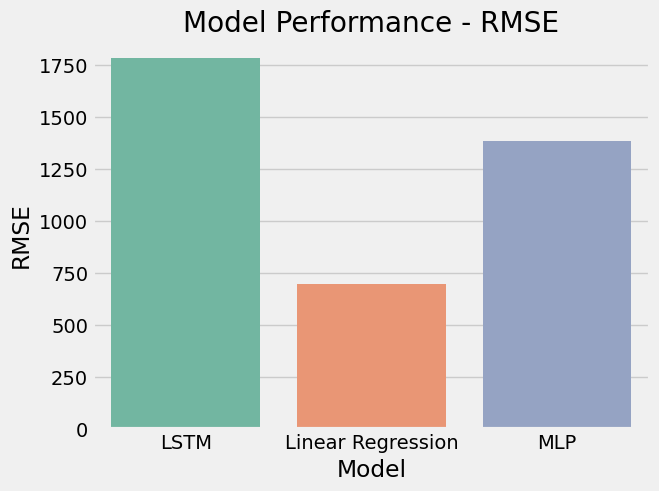

In [344]:
model_performance = pd.DataFrame()
model_performance['Model'] = ['LSTM','Linear Regression','MLP']
model_performance['RMSE'] = [math.sqrt(mean_squared_error(original_ytest, test_predict)),
                               np.sqrt(mean_squared_error(y_test, lr_preds)),
                               np.sqrt(mean_squared_error(y_test, y_pred))]
model_performance['MSE'] = [mean_squared_error(original_ytest, test_predict),
                             mean_squared_error(y_test, lr_preds),
                             mean_squared_error(y_test, y_pred)]
model_performance['MAE'] = [mean_absolute_error(original_ytest, test_predict),
                             mean_absolute_error(y_test, lr_preds),
                             mean_absolute_error(y_test, y_pred)]
model_performance['R2 Score'] = [r2_score(original_ytest, test_predict),
                                  r2_score(y_test, lr_preds),
                                  r2_score(y_test, y_pred)]
model_performance.set_index('Model', inplace=True)
sns.barplot(x=model_performance.index, y='RMSE', data=model_performance,palette='Set2')
plt.title('Model Performance - RMSE')
plt.show()

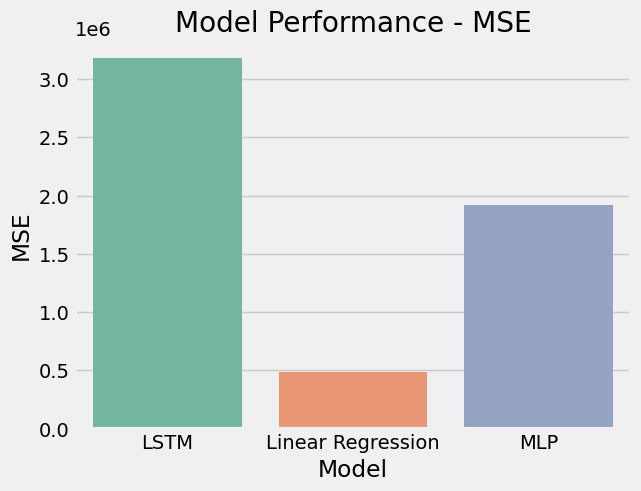

In [345]:
sns.barplot(x=model_performance.index, y='MSE', data=model_performance,palette='Set2')
plt.title('Model Performance - MSE')
plt.show()

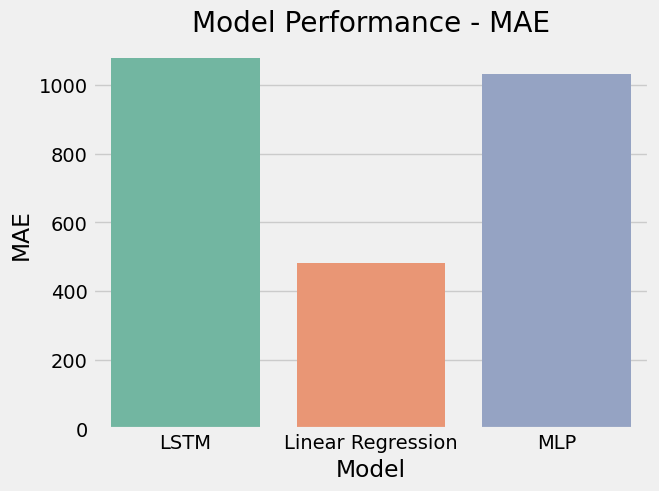

In [346]:
sns.barplot(x=model_performance.index, y='MAE', data=model_performance,palette='Set2')
plt.title('Model Performance - MAE')
plt.show()

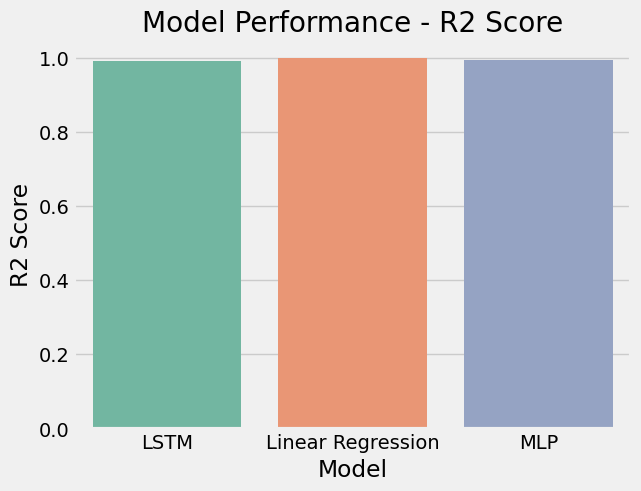

In [347]:
sns.barplot(x=model_performance.index, y='R2 Score', data=model_performance,palette='Set2')
plt.title('Model Performance - R2 Score')
plt.show()